In [3]:
from datasets import load_dataset
from transformers import AutoModelForImageClassification

ds = (load_dataset("imagefolder", data_dir="homus_data",split="train",drop_labels=False).train_test_split(test_size=0.1))




Resolving data files:   0%|          | 0/15200 [00:00<?, ?it/s]

Found cached dataset imagefolder (C:/Users/x_zhu202/.cache/huggingface/datasets/imagefolder/default-2e5e000c34d1af59/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 13680
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1520
    })
})

In [5]:
label_names = ds["test"].features["label"].names
label_names

['12-8-Time',
 '2-2-Time',
 '2-4-Time',
 '3-4-Time',
 '3-8-Time',
 '4-4-Time',
 '6-8-Time',
 '9-8-Time',
 'Barline',
 'C-Clef',
 'Common-Time',
 'Cut-Time',
 'Dot',
 'Double-Sharp',
 'Eighth-Note',
 'Eighth-Rest',
 'F-Clef',
 'Flat',
 'G-Clef',
 'Half-Note',
 'Natural',
 'Quarter-Note',
 'Quarter-Rest',
 'Sharp',
 'Sixteenth-Note',
 'Sixteenth-Rest',
 'Sixty-Four-Note',
 'Sixty-Four-Rest',
 'Thirty-Two-Note',
 'Thirty-Two-Rest',
 'Whole-Half-Rest',
 'Whole-Note']

Sixty-Four-Note


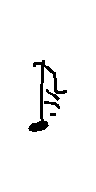

In [8]:
from transformers import pipeline
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

image = ds["test"]["image"][0]
label = ds["test"]["label"][0]
print(label_names[label])
image
# orig_img = image
# def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
#     if not isinstance(imgs[0], list):
#         # Make a 2d grid even if there's just 1 row
#         imgs = [imgs]
#
#     num_rows = len(imgs)
#     num_cols = len(imgs[0]) + with_orig
#     fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
#     for row_idx, row in enumerate(imgs):
#         row = [orig_img] + row if with_orig else row
#         for col_idx, img in enumerate(row):
#             ax = axs[row_idx, col_idx]
#             ax.imshow(np.asarray(img), **imshow_kwargs)
#             ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
#
#     if with_orig:
#         axs[0, 0].set(title='Original image')
#         axs[0, 0].title.set_size(8)
#     if row_title is not None:
#         for row_idx in range(num_rows):
#             axs[row_idx, 0].set(ylabel=row_title[row_idx])
#
#     plt.tight_layout()
#
# (top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(80, 34))(orig_img)
# plot([top_left, top_right, bottom_left, bottom_right, center])

In [7]:
classifier = pipeline("image-classification", model="outputs_2")
classifier(image)

[{'score': 0.559884786605835, 'label': 'Sixty-Four-Note'},
 {'score': 0.34803545475006104, 'label': 'Thirty-Two-Note'},
 {'score': 0.01967209205031395, 'label': 'Sixteenth-Note'},
 {'score': 0.004806536249816418, 'label': 'C-Clef'},
 {'score': 0.0043877805583179, 'label': 'Eighth-Note'}]

In [34]:
#read a png and pass to classifier

sample = Image.open(".\\Unseen_test\\sample.png")
classifier(sample)

C:\Users\x_zhu202\anaconda3\envs\Music\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[{'score': 0.7565330862998962, 'label': 'Quarter-Note'},
 {'score': 0.03521042317152023, 'label': 'Barline'},
 {'score': 0.028660669922828674, 'label': 'Eighth-Note'},
 {'score': 0.026267195120453835, 'label': 'Half-Note'},
 {'score': 0.011642131954431534, 'label': 'C-Clef'}]

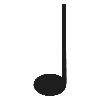

In [18]:
sample.resize((100,100))

In [35]:
c_clef = Image.open(".\\Unseen_test\\c-clef_sample.jpg")
classifier(c_clef)

[{'score': 0.8850137591362, 'label': 'C-Clef'},
 {'score': 0.013500595465302467, 'label': 'Sharp'},
 {'score': 0.007200691848993301, 'label': '12-8-Time'},
 {'score': 0.005304527468979359, 'label': 'Whole-Half-Rest'},
 {'score': 0.004796328488737345, 'label': 'G-Clef'}]

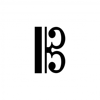

In [19]:
c_clef.resize((100,100))

In [24]:
half_note = Image.open(".\\Unseen_test\\half_note.png")
classifier(half_note)


[{'score': 0.9076569080352783, 'label': 'Half-Note'},
 {'score': 0.012020687572658062, 'label': 'Quarter-Note'},
 {'score': 0.011655572801828384, 'label': 'Barline'},
 {'score': 0.005738425068557262, 'label': 'Whole-Note'},
 {'score': 0.004891060292720795, 'label': 'Flat'}]

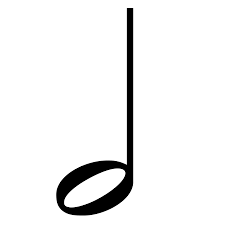

In [25]:
half_note

In [26]:
f_clef = Image.open(".\\Unseen_test\\f_clef.png")
classifier(f_clef)

[{'score': 0.8796402812004089, 'label': 'F-Clef'},
 {'score': 0.018305785953998566, 'label': 'Common-Time'},
 {'score': 0.0076107243075966835, 'label': 'Sixty-Four-Rest'},
 {'score': 0.006926759146153927, 'label': 'Thirty-Two-Rest'},
 {'score': 0.0068232957273721695, 'label': 'Eighth-Rest'}]

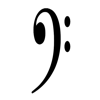

In [27]:
f_clef.resize((100,100))